### 0. Importación de librerías y carga de datos

In [1]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# q-q plots
import scipy.stats as stats

# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

In [2]:
# Se cargan los datos
# Ubicación de los datos, deben estar en la misma carpeta que este notebook

#pais, liga = "belgica", "jupiler-pro-league"
#pais, liga = "espana", "laliga"
#pais, liga = "espana", "laliga-smartbank"
#pais, liga = "francia", "ligue-1"
#pais, liga = "francia", "ligue-2"
#pais, liga = "inglaterra", "championship"
#pais, liga = "inglaterra", "premier-league"
#pais, liga = "italia", "serie-a"
#pais, liga = "italia", "serie-b"
#pais, liga = "paises-bajos", "eredivisie"
pais, liga = "portugal", "liga-portugal"
#pais, liga = "turquia", "super-lig"

version = 0

db_location = f"data/{pais}_{liga}/version{version}/resultados_anteriores.csv"

# Se leen los datos, estan separados con ','
data = pd.read_csv(db_location, sep=',', encoding = 'utf-8', na_values = '-')

### 1. Entendimiento de los datos

In [3]:
# Se revisa la forma general de los datos cargados
data.shape

(170, 42)

In [4]:
# Se muestra una pequeña muestra de los datos
data.head()

,Date,HomeTeam,AwayTeam,HG,AG,HP,AP,HTS,ATS,HSI,...,ATP,HPC,APC,HT,AT,HA,AA,HDA,ADA,Resultado
0,06.02.2023 16:15,Rio Ave,Sporting CP,0,1,37%,63%,5,8,1,...,606,268.0,502.0,16,20,123,129,21,44,-1
1,06.02.2023 14:00,Portimonense,P. Ferreira,1,0,65%,35%,15,8,3,...,260,378.0,164.0,10,8,133,75,43,26,1
2,05.02.2023 15:30,Gil Vicente,Arouca,1,1,53%,47%,17,12,7,...,430,397.0,342.0,11,26,129,100,66,25,0
3,05.02.2023 13:00,Oporto,Vizela,2,0,63%,37%,15,10,4,...,339,450.0,258.0,13,21,128,79,71,26,2
4,05.02.2023 10:30,Chaves,Marítimo,2,1,36%,64%,7,16,5,...,458,179.0,364.0,11,17,93,95,39,48,1


In [5]:
# Se imprimen los diferentes tipos de las columnas. Todas son numéricas
#data.dtypes

Date          object
HomeTeam      object
AwayTeam      object
HG             int64
AG             int64
HP            object
AP            object
HTS            int64
ATS            int64
HSI            int64
ASI            int64
HSO            int64
ASO            int64
HBS            int64
ABS            int64
HFK            int64
AFK            int64
HC             int64
AC             int64
HOFF           int64
AOFF           int64
HTI            int64
ATI            int64
HGS            int64
AGS            int64
HF             int64
AF             int64
HRC          float64
ARC          float64
HYC          float64
AYC          float64
HTP            int64
ATP            int64
HPC          float64
APC          float64
HT             int64
AT             int64
HA             int64
AA             int64
HDA            int64
ADA            int64
Resultado      int64
dtype: object

In [6]:
# Se hace una decripción de los datos
data.describe()

,HG,AG,HTS,ATS,HSI,ASI,HSO,ASO,HBS,ABS,...,ATP,HPC,APC,HT,AT,HA,AA,HDA,ADA,Resultado
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,168.000000,168.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.435294,1.047059,14.070588,11.535294,4.800000,3.711765,5.717647,5.047059,3.552941,2.776471,...,413.882353,337.880952,324.148810,16.564706,16.535294,106.411765,98.635294,45.517647,39.958824,0.388235
std,1.379881,1.059260,5.896119,5.065423,2.679309,2.491259,2.985613,2.725752,2.292286,1.803196,...,103.966416,126.004316,113.818042,4.722969,5.225273,27.118322,24.725162,18.685571,16.695092,1.903557
min,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,192.000000,0.000000,0.000000,8.000000,6.000000,36.000000,32.000000,10.000000,8.000000,-6.000000
25%,0.000000,0.000000,9.000000,8.000000,3.000000,2.000000,4.000000,3.000000,2.000000,1.000000,...,334.750000,255.000000,250.500000,13.000000,13.000000,88.000000,84.000000,33.000000,29.000000,-1.000000
50%,1.000000,1.000000,14.000000,11.000000,5.000000,3.000000,6.000000,5.000000,3.000000,3.000000,...,404.500000,320.500000,322.500000,16.000000,16.000000,102.000000,99.000000,41.000000,38.000000,0.000000
75%,2.000000,2.000000,18.000000,14.000000,6.000000,5.000000,7.000000,7.000000,5.000000,4.000000,...,481.750000,418.500000,393.000000,19.000000,20.000000,122.000000,111.750000,56.000000,48.750000,1.000000
max,5.000000,6.000000,32.000000,27.000000,12.000000,13.000000,17.000000,13.000000,11.000000,8.000000,...,705.000000,779.000000,624.000000,34.000000,35.000000,193.000000,195.000000,119.000000,116.000000,5.000000


In [7]:
# Se observa que no existen valores nulos en las variables
data.isnull().sum()

Date           0
HomeTeam       0
AwayTeam       0
HG             0
AG             0
HP             0
AP             0
HTS            0
ATS            0
HSI            0
ASI            0
HSO            0
ASO            0
HBS            0
ABS            0
HFK            0
AFK            0
HC             0
AC             0
HOFF           0
AOFF           0
HTI            0
ATI            0
HGS            0
AGS            0
HF             0
AF             0
HRC          120
ARC          120
HYC            1
AYC            1
HTP            0
ATP            0
HPC            2
APC            2
HT             0
AT             0
HA             0
AA             0
HDA            0
ADA            0
Resultado      0
dtype: int64

### 2. Identificación de variables a utilizar

In [8]:
# Se revisa si la variable objetivo está correlacionada con otra variable
#plt.figure(figsize =(30,30))
#correlacion = data.corr()
#sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

In [9]:
# Se diagrama la relación entre cada variable explicativa y la variable objetivo
#sns.pairplot(data, height=3, y_vars = 'Resultado', x_vars = data.columns[0:4], kind='scatter')
#sns.pairplot(data, height=3, y_vars = 'Resultado', x_vars = data.columns[4:10], kind='scatter')
#sns.pairplot(data, height=3, y_vars = 'Resultado', x_vars = data.columns[8:12], kind='scatter')
#sns.pairplot(data, height=3, y_vars = 'Resultado', x_vars = data.columns[12:16], kind='scatter')
#sns.pairplot(data, height=3, y_vars = 'Resultado', x_vars = data.columns[16:20], kind='scatter')
#sns.pairplot(data, height=3, y_vars = 'Resultado', x_vars = data.columns[20:24], kind='scatter')
#sns.pairplot(data, height=3, y_vars = 'Resultado', x_vars = data.columns[24:28], kind='scatter')
#sns.pairplot(data, height=3, y_vars = 'Resultado', x_vars = data.columns[28:32], kind='scatter')

In [10]:
selected_cols = ['HTS', 'ATS', 'HSI', 'ASI', 'HSO', 'ASO', 'HBS', 'ABS', 'HGS', 'AGS']
selected_cols2 = ['HP', 'AP', 'HC', 'AC', 'HOFF', 'AOFF', 'HF', 'AF',
                    'HYC', 'AYC', 'HTP', 'ATP', 'HT', 'AT', 'HA', 'AA', 'HDA', 'ADA']

### 3. Limpieza y preparación de datos

In [11]:
# los pasos de limpieza y preparación se realizan sobre otro archivo
df_data = data.copy()[selected_cols]
df_data.insert(0, "Resultado", data["Resultado"])

In [12]:
df_data.head()

,Resultado,HTS,ATS,HSI,ASI,HSO,ASO,HBS,ABS,HGS,AGS
0,-1,5,8,1,1,3,5,1,2,0,1
1,1,15,8,3,4,7,4,5,0,4,2
2,0,17,12,7,6,7,4,3,2,5,6
3,2,15,10,4,3,4,4,7,3,3,2
4,1,7,16,5,3,1,9,1,4,2,3


In [13]:
#def convert_possession(value):
#    value2 = str(value)  # cast to string
#    value3 = value2[:-1] # last four characters
#    return int(value3) if len(value3) > 0 else 50

#df_data['HP'] = df_data['HP'].apply(convert_possession)
#df_data['AP'] = df_data['AP'].apply(convert_possession)

In [14]:
#def convert_yellow_cards(value):
#    return int(value)

#df_data['HYC'] = df_data['HYC'].fillna(0)
#df_data['AYC'] = df_data['AYC'].fillna(0)
#df_data['HYC'] = df_data['HYC'].apply(convert_yellow_cards)
#df_data['AYC'] = df_data['AYC'].apply(convert_yellow_cards)

In [15]:
df_data.head()

,Resultado,HTS,ATS,HSI,ASI,HSO,ASO,HBS,ABS,HGS,AGS
0,-1,5,8,1,1,3,5,1,2,0,1
1,1,15,8,3,4,7,4,5,0,4,2
2,0,17,12,7,6,7,4,3,2,5,6
3,2,15,10,4,3,4,4,7,3,3,2
4,1,7,16,5,3,1,9,1,4,2,3


### 4. Modelamiento

#### Pipeline 1: solo con selección de variables

In [16]:
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]
# Se declara el modelo
model = [('model', LinearRegression())]
# Se declara el pipeline
pipeline1 = Pipeline(pre+model)

In [17]:
# Se extraen las variables explicativas y objetivo para entrenar
df_datap1 = df_data

X = df_datap1.drop('Resultado', axis = 1)
Y = df_datap1['Resultado']

# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

# Se entrena el modelo
pipeline1 = pipeline1.fit(X_train,Y_train)

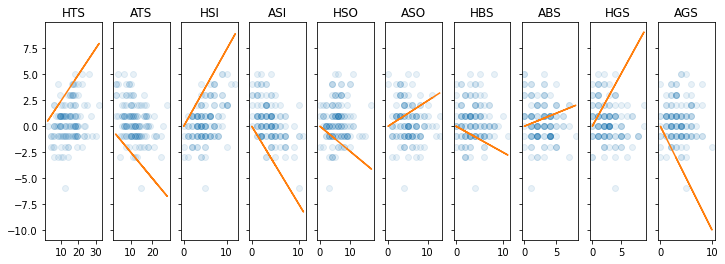

In [18]:
# Se visualiza la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):
    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X_train[col]
    # Pendiente
    m = pipeline1['model'].coef_[pos_col]
    # Interceto
    b = pipeline1['model'].intercept_

    axs[i].plot(x, Y_train, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

In [19]:
# Vale la pena hacer estandarización de los datos para tener coeficientes más comparables en misma escala.
importancia = pipeline1['model'].coef_
pd.options.display.float_format = '{:.5f}'.format
importancia_atributo = pd.DataFrame(data={"Atributo": selected_cols,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,HGS,1.00465
1,HSI,0.74140
2,ABS,0.25201
3,HTS,0.24885
4,ASO,0.24582
5,HSO,-0.24215
6,ATS,-0.24921
7,HBS,-0.25040
8,ASI,-0.74704
9,AGS,-0.99643


In [20]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = pipeline1.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #1 - Datos de entrenamiento")
print("RMSE: %.2f" % np.sqrt(mse(Y_train, y_pred)))
print('R²: %.2f' % r2_score(Y_train, y_pred))

Estadísticas Pipeline #1 - Datos de entrenamiento
RMSE: 0.12
R²: 1.00


In [21]:
# Se obtienen las predicciones del modelo sobre el conjunto de test.
y_pred = pipeline1.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #1 - Datos de test")
print("RMSE: %.2f" % np.sqrt(mse(Y_test, y_pred)))
print('R²: %.2f' % r2_score(Y_test, y_pred))

Estadísticas Pipeline #1 - Datos de test
RMSE: 0.17
R²: 0.99


In [22]:
# Se revisa la colinealidad
#df_temp = df_datap1[selected_cols]
#plt.figure(figsize =(30,30))
#correlacion = df_datap1.corr()
#sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

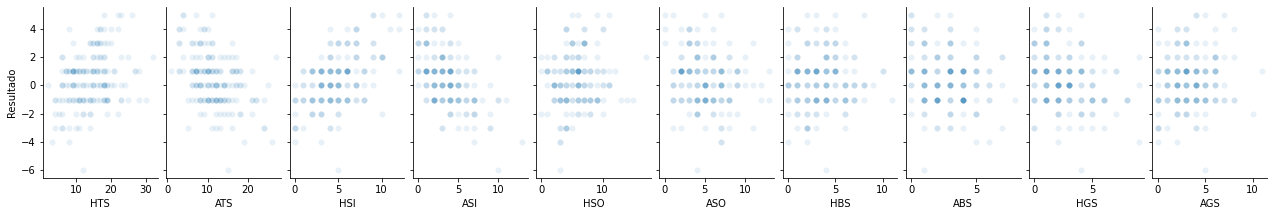

In [23]:
# Linealidad
#Se ven datos relativamente juntos, sin embargo, hay una pequeña cantidad de datos fuera de esta cohesión en las tres variables.
sns.pairplot(df_datap1, height=3, aspect = 0.6, y_vars = 'Resultado', x_vars = selected_cols, kind='scatter', plot_kws = {'alpha':0.1})

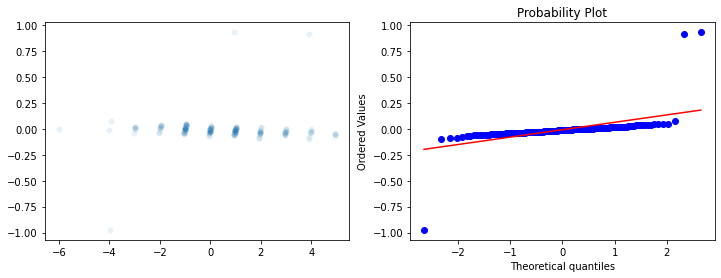

In [24]:
# Nos sirve para revisar si los errores vienen con una distribución teoríca. En este caso, de una distribución normal.
X = df_data.drop('Resultado', axis = 1)
y = df_data['Resultado']

# Calculamos los errores
errors = (pipeline1.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = pipeline1.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

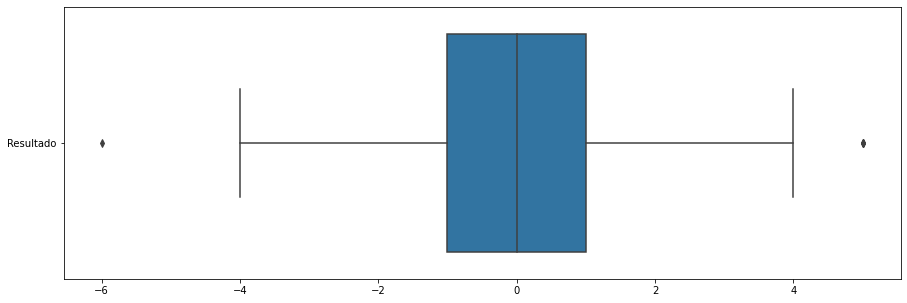

In [25]:
# Diagrama de caja
# Acá podemos ver los valores atípicos de Life expectancy.
# En este caso están los menores a 44.5.
fig=plt.figure(figsize=(15,5))
ax = sns.boxplot(data= df_datap1[['Resultado']], orient="h")

#### Pipeline 2: Modelo con eliminación de valores atípicos en la variable objetivo y estandarización

In [26]:
# Se eliminan los valores atípicos que indica el diagrama de caja.
df_datap2 = df_data
#df_datap2 = df_datap2.drop(df_datap2[df_datap2['Resultado'] <= -2].index)
#df_datap2 = df_datap2.drop(df_datap2[df_datap2['Resultado'] > 2].index)

In [27]:
# Se declara el modelo
model2 = [('model2', LinearRegression())]

#Pre
pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),
       ('scaler', StandardScaler()),]

# Se declara el pipeline
pipeline2 = Pipeline(pre+model2)

# Se extraen las variables explicativas y objetivo para entrenar
X = df_datap2.drop('Resultado', axis = 1)
Y = df_datap2['Resultado']

# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

# Se entrena el modelo
pipeline2 = pipeline2.fit(X_train,Y_train)

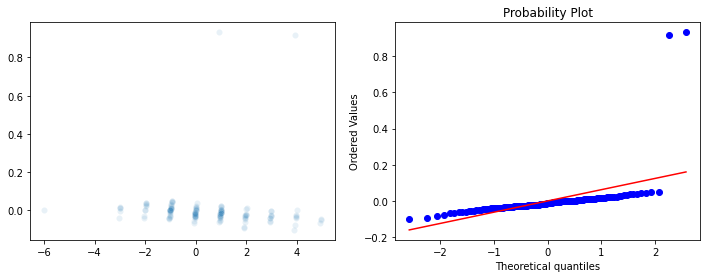

In [28]:
# Se calculan los errores
errors = (pipeline2.predict(X_train) - Y_train).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = pipeline2.predict(X_train), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

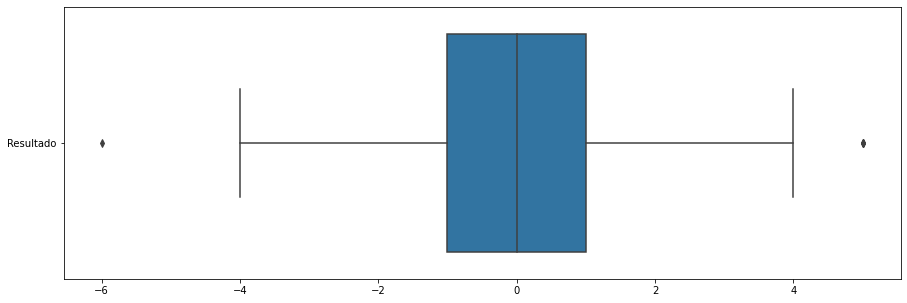

In [29]:
# Diagrama de caja
# Se ve que los datos ya están eliminados
fig=plt.figure(figsize=(15,5))
ax = sns.boxplot(data= df_datap2[['Resultado']], orient="h")

In [30]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = pipeline2.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #2 - Datos de entrenamiento")
print("RMSE: %.2f" % np.sqrt(mse(Y_train, y_pred)))
print('R²: %.2f' % r2_score(Y_train, y_pred))

Estadísticas Pipeline #2 - Datos de entrenamiento
RMSE: 0.12
R²: 1.00


In [31]:
# Se obtienen las predicciones del modelo sobre el conjunto de test.
y_pred = pipeline2.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #2 - Datos de test")
print("RMSE: %.2f" % np.sqrt(mse(Y_test, y_pred)))
print('R²: %.2f' % r2_score(Y_test, y_pred))

Estadísticas Pipeline #2 - Datos de test
RMSE: 0.17
R²: 0.99


### 5. Evaluación cuantitativa

In [32]:
# Se ajusta el modelo para ver el reporte de estadísticas
model = sm.OLS(Y, X).fit()
# Se muestran las estadísticas del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Resultado   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              4620.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):                   6.32e-187
Time:                        17:16:31   Log-Likelihood:                          108.29
No. Observations:                 170   AIC:                                     -200.6
Df Residuals:                     162   BIC:                                     -175.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HTS            0.2477      0.002    129.161      0.000       0.244       0.251
ATS           -0.2467      0.003    -97.542      0.000      -0.252      -0.242
HSI            0.7412      0.006    130.897      0.000       0.730       0.752
ASI           -0.7393      0.008    -98.253      0.000      -0.754      -0.724
HSO           -0.2427      0.004    -58.745      0.000      -0.251      -0.235
ASO            0.2463      0.004     57.214      0.000       0.238       0.255
HBS           -0.2508      0.004    -57.528      0.000      -0.259      -0.242
ABS            0.2463      0.006     43.849      0.000       0.235       0.257
HGS            0.9913      0.012     84.048      0.000       0.968       1.015
AGS           -0.9979      0.010   -103.847      0.000      -1.017      -0.979
==============================================================================
Omnibus:                      151.175   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14979.790
Skew:                          -2.449   Prob(JB):                         0.00
Kurtosis:                      48.725   Cond. No.                     3.58e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.58e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
# Se guarda el pipeline en el archivo
filename = 'model/modelo.joblib' # Ubicación del archivo a entregar
dump(pipeline2, filename)

['model/modelo.joblib']

In [34]:
# Proceso de prueba del cliente
df_recent = pd.read_csv(f"data/{pais}_{liga}/version{version}/proximos_partidos.csv", sep=',', encoding = 'utf-8', na_values = '-') # Lectura de los datos recientes

# Se lee el archivo y carga el modelo
pipeline = load(filename)

y_predicted = pipeline.predict(df_recent)

In [35]:
for i in y_predicted[:29]:
    print ("{:.2f}".format(i).replace('.', ','))

0,99
0,17
2,13
-3,29
-1,12
2,10
-5,16
-1,25
-0,03
-0,11
1,98
0,78
2,64
0,49
0,99
0,14
1,23
3,74
-1,56
1,45
0,67
1,47
-1,36
3,40
0,41
1,71
-5,79
2,86
-1,01


In [36]:
for i in range(len(y_predicted[:29])):
    home_team = df_recent.iloc[i]["HomeTeam"]
    away_team = df_recent.iloc[i]["AwayTeam"]
    
    print(home_team + " vs " + away_team)
    print(y_predicted[i])
    ganador = home_team if y_predicted[i] >= 0.5 else (away_team if y_predicted[i] <= -0.5 else "ninguno")
    if ganador == "ninguno":
            print("No hay ganador claro. " + str(abs(y_predicted[i]))[:4])
    else:
        print("Gana " + ganador + " por " + str(abs(y_predicted[i]))[:4] + " goles")
    print()

Estoril vs Boavista
0.986938430756634
Gana Estoril por 0.98 goles

Vizela vs Chaves
0.17350841932925204
No hay ganador claro. 0.17

Arouca vs Santa Clara
2.1252197012531595
Gana Arouca por 2.12 goles

V. Guimaraes vs Portimonense
-3.2857651673082064
Gana Portimonense por 3.28 goles

Famalicao vs Gil Vicente
-1.118843241666986
Gana Gil Vicente por 1.11 goles

Sporting CP vs Oporto
2.102693011437304
Gana Sporting CP por 2.10 goles

Marítimo vs SC Braga
-5.161853076218712
Gana SC Braga por 5.16 goles

Rio Ave vs Estoril
-1.2496285994833127
Gana Estoril por 1.24 goles

Boavista vs Casa Pia
-0.03373793694940347
No hay ganador claro. 0.03

Gil Vicente vs Vizela
-0.10846506172363507
No hay ganador claro. 0.10

Portimonense vs Marítimo
1.978179323908715
Gana Portimonense por 1.97 goles

Estoril vs P. Ferreira
0.7789233089801482
Gana Estoril por 0.77 goles

Oporto vs Rio Ave
2.636845795240569
Gana Oporto por 2.63 goles

Santa Clara vs Famalicao
0.4888212546610134
No hay ganador claro. 0.48

SC 